In [2]:
import cv2
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from keras import layers, Input, models, optimizers
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D, Conv2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing import image

In [3]:
import os, shutil

original_dataset_dir = './data/clothes_category/'

base_dir = './data/clothes_category_small'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_Blouse_dir = os.path.join(train_dir, 'Blouse')
os.mkdir(train_Blouse_dir)

train_Chiffon_skirt_dir = os.path.join(train_dir, 'Chiffon_skirt')
os.mkdir(train_Chiffon_skirt_dir)

train_Coat_dir = os.path.join(train_dir, 'Coat')
os.mkdir(train_Coat_dir)

train_Cotten_long_pants_dir = os.path.join(train_dir, 'Cotten_long_pants')
os.mkdir(train_Cotten_long_pants_dir)

train_Cutoffs_dir = os.path.join(train_dir, 'Cutoffs')
os.mkdir(train_Cutoffs_dir)

train_H_line_skirt_dir = os.path.join(train_dir, 'H_line_skirt')
os.mkdir(train_H_line_skirt_dir)

train_Hoodie_dir = os.path.join(train_dir, 'Hoodie')
os.mkdir(train_Hoodie_dir)

train_Jacket_dir = os.path.join(train_dir, 'Jacket')
os.mkdir(train_Jacket_dir)

train_Jeans_dir = os.path.join(train_dir, 'Jeans')
os.mkdir(train_Jeans_dir)

train_Long_sleeve_tee_dir = os.path.join(train_dir, 'Long_sleeve_tee')
os.mkdir(train_Long_sleeve_tee_dir)

train_Shirts_dir = os.path.join(train_dir, 'Shirts')
os.mkdir(train_Shirts_dir)

train_Short_sleeve_tee_dir = os.path.join(train_dir, 'Short_sleeve_tee')
os.mkdir(train_Short_sleeve_tee_dir)

train_Sweater_dir = os.path.join(train_dir, 'Sweater')
os.mkdir(train_Sweater_dir)

In [4]:
validation_Blouse_dir = os.path.join(validation_dir, 'Blouse')
os.mkdir(validation_Blouse_dir)

validation_Chiffon_skirt_dir = os.path.join(validation_dir, 'Chiffon_skirt')
os.mkdir(validation_Chiffon_skirt_dir)

validation_Coat_dir = os.path.join(validation_dir, 'Coat')
os.mkdir(validation_Coat_dir)

validation_Cotten_long_pants_dir = os.path.join(validation_dir, 'Cotten_long_pants')
os.mkdir(validation_Cotten_long_pants_dir)

validation_Cutoffs_dir = os.path.join(validation_dir, 'Cutoffs')
os.mkdir(validation_Cutoffs_dir)

validation_H_line_skirt_dir = os.path.join(validation_dir, 'H_line_skirt')
os.mkdir(validation_H_line_skirt_dir)

validation_Hoodie_dir = os.path.join(validation_dir, 'Hoodie')
os.mkdir(validation_Hoodie_dir)

validation_Jacket_dir = os.path.join(validation_dir, 'Jacket')
os.mkdir(validation_Jacket_dir)

validation_Jeans_dir = os.path.join(validation_dir, 'Jeans')
os.mkdir(validation_Jeans_dir)

validation_Long_sleeve_tee_dir = os.path.join(validation_dir, 'Long_sleeve_tee')
os.mkdir(validation_Long_sleeve_tee_dir)

validation_Shirts_dir = os.path.join(validation_dir, 'Shirts')
os.mkdir(validation_Shirts_dir)

validation_Short_sleeve_tee_dir = os.path.join(validation_dir, 'Short_sleeve_tee')
os.mkdir(validation_Short_sleeve_tee_dir)

validation_Sweater_dir = os.path.join(validation_dir, 'Sweater')
os.mkdir(validation_Sweater_dir)

In [5]:
test_Blouse_dir = os.path.join(test_dir, 'Blouse')
os.mkdir(test_Blouse_dir)

test_Chiffon_skirt_dir = os.path.join(test_dir, 'Chiffon_skirt')
os.mkdir(test_Chiffon_skirt_dir)

test_Coat_dir = os.path.join(test_dir, 'Coat')
os.mkdir(test_Coat_dir)

test_Cotten_long_pants_dir = os.path.join(test_dir, 'Cotten_long_pants')
os.mkdir(test_Cotten_long_pants_dir)

test_Cutoffs_dir = os.path.join(test_dir, 'Cutoffs')
os.mkdir(test_Cutoffs_dir)

test_H_line_skirt_dir = os.path.join(test_dir, 'H_line_skirt')
os.mkdir(test_H_line_skirt_dir)

test_Hoodie_dir = os.path.join(test_dir, 'Hoodie')
os.mkdir(test_Hoodie_dir)

test_Jacket_dir = os.path.join(test_dir, 'Jacket')
os.mkdir(test_Jacket_dir)

test_Jeans_dir = os.path.join(test_dir, 'Jeans')
os.mkdir(test_Jeans_dir)

test_Long_sleeve_tee_dir = os.path.join(test_dir, 'Long_sleeve_tee')
os.mkdir(test_Long_sleeve_tee_dir)

test_Shirts_dir = os.path.join(test_dir, 'Shirts')
os.mkdir(test_Shirts_dir)

test_Short_sleeve_tee_dir = os.path.join(test_dir, 'Short_sleeve_tee')
os.mkdir(test_Short_sleeve_tee_dir)

test_Sweater_dir = os.path.join(test_dir, 'Sweater')
os.mkdir(test_Sweater_dir)

In [6]:
fnames = ['Blouse{}.jpg'.format(i) for i in range(211)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Blouse_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Blouse{}.jpg'.format(i) for i in range(211,316)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Blouse_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Blouse{}.jpg'.format(i) for i in range(316,421)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Blouse_dir, fname)
    shutil.copyfile(src,dst)

In [8]:
fnames = ['Chiffon_skirt{}.jpg'.format(i) for i in range(276)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Chiffon_skirt_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Chiffon_skirt{}.jpg'.format(i) for i in range(276,414)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Chiffon_skirt_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Chiffon_skirt{}.jpg'.format(i) for i in range(414,552)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Chiffon_skirt_dir, fname)
    shutil.copyfile(src,dst)

In [9]:
fnames = ['Coat{}.jpg'.format(i) for i in range(299)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Coat_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Coat{}.jpg'.format(i) for i in range(299,449)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Coat_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Coat{}.jpg'.format(i) for i in range(449,598)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Coat_dir, fname)
    shutil.copyfile(src,dst)

In [10]:
fnames = ['Cotten_long_pants{}.jpg'.format(i) for i in range(86)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Cotten_long_pants_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Cotten_long_pants{}.jpg'.format(i) for i in range(86,129)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Cotten_long_pants_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Cotten_long_pants{}.jpg'.format(i) for i in range(129,172)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Cotten_long_pants_dir, fname)
    shutil.copyfile(src,dst)

In [11]:
fnames = ['Cutoffs{}.jpg'.format(i) for i in range(249)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Cutoffs_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Cutoffs{}.jpg'.format(i) for i in range(249,373)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Cutoffs_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Cutoffs{}.jpg'.format(i) for i in range(373,497)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Cutoffs_dir, fname)
    shutil.copyfile(src,dst)

In [13]:
fnames = ['H_line{}.jpg'.format(i) for i in range(265)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_H_line_skirt_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['H_line{}.jpg'.format(i) for i in range(265,397)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_H_line_skirt_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['H_line{}.jpg'.format(i) for i in range(397,529)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_H_line_skirt_dir, fname)
    shutil.copyfile(src,dst)

In [14]:
fnames = ['Hoodie{}.jpg'.format(i) for i in range(1253)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Hoodie_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Hoodie{}.jpg'.format(i) for i in range(1253,1880)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Hoodie_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Hoodie{}.jpg'.format(i) for i in range(1880,2506)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Hoodie_dir, fname)
    shutil.copyfile(src,dst)

In [15]:
fnames = ['Jacket{}.jpg'.format(i) for i in range(428)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Jacket_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Jacket{}.jpg'.format(i) for i in range(428,641)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Jacket_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Jacket{}.jpg'.format(i) for i in range(641,855)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Jacket_dir, fname)
    shutil.copyfile(src,dst)

In [16]:
fnames = ['Jeans{}.jpg'.format(i) for i in range(600)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Jeans_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Jeans{}.jpg'.format(i) for i in range(600,300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Jeans_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Jeans{}.jpg'.format(i) for i in range(900,1200)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Jeans_dir, fname)
    shutil.copyfile(src,dst)

In [17]:
fnames = ['Long_sleeve_tee{}.jpg'.format(i) for i in range(160)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Long_sleeve_tee_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Long_sleeve_tee{}.jpg'.format(i) for i in range(160,239)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Long_sleeve_tee_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Long_sleeve_tee{}.jpg'.format(i) for i in range(239,319)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Long_sleeve_tee_dir, fname)
    shutil.copyfile(src,dst)

In [18]:
fnames = ['Shirts{}.jpg'.format(i) for i in range(300)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Shirts_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Shirts{}.jpg'.format(i) for i in range(300,449)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Shirts_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Shirts{}.jpg'.format(i) for i in range(449,599)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Shirts_dir, fname)
    shutil.copyfile(src,dst)

In [19]:
fnames = ['Short_sleeve_tee{}.jpg'.format(i) for i in range(636)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Short_sleeve_tee_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Short_sleeve_tee{}.jpg'.format(i) for i in range(636,954)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Short_sleeve_tee_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Short_sleeve_tee{}.jpg'.format(i) for i in range(954,1272)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Short_sleeve_tee_dir, fname)
    shutil.copyfile(src,dst)

In [20]:
fnames = ['Sweater{}.jpg'.format(i) for i in range(336)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_Sweater_dir, fname)
    shutil.copyfile(src,dst)

fnames = ['Sweater{}.jpg'.format(i) for i in range(336,503)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_Sweater_dir, fname)
    shutil.copyfile(src,dst)
    
fnames = ['Sweater{}.jpg'.format(i) for i in range(503,671)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_Sweater_dir, fname)
    shutil.copyfile(src,dst)

In [21]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(13,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [22]:
from keras import optimizers

model.compile(loss='categorical_crossentropy', #sparse_categorical_crossentropy
              optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=10,
class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=10,
class_mode='categorical')

Found 5099 images belonging to 13 classes.
Found 2245 images belonging to 13 classes.


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/20
100/100 [==============================] - 43s 429ms/step - loss: 2.2940 - acc: 0.2710 - val_loss: 2.2601 - val_acc: 0.2720
Epoch 2/20
100/100 [==============================] - 41s 408ms/step - loss: 1.9788 - acc: 0.3680 - val_loss: 2.0805 - val_acc: 0.2900
Epoch 3/20
100/100 [==============================] - 42s 421ms/step - loss: 1.7889 - acc: 0.4160 - val_loss: 1.8867 - val_acc: 0.3520
Epoch 4/20
100/100 [==============================] - 42s 415ms/step - loss: 1.7434 - acc: 0.4161 - val_loss: 1.8484 - val_acc: 0.3860
Epoch 5/20
100/100 [==============================] - 41s 410ms/step - loss: 1.6728 - acc: 0.4330 - val_loss: 1.8266 - val_acc: 0.3840
Epoch 6/20
100/100 [==============================] - 40s 402ms/step - loss: 1.5832 - acc: 0.4440 - val_loss: 1.7665 - val_acc: 0.4120
Epoch 7/20
100/100 [==============================] - 40s 405ms/step - loss: 1.5360 - acc: 0.5056 - val_loss: 1.7591 - val_acc: 0.4240
Epoch 8/20
100/100 [==============================] - 4

In [25]:
model.save('clothes_category_64.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
# plt.tilte('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
# plt.tilte('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# from keras.preprocessing import image

# fnames = sorted([os.path.join(train_coat_dir, fname) for fname in os.listdir(train_c)])

In [26]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

In [27]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = './data/clothes_category_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [31]:
def extract_features(directory,sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,13))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150,150),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 4000) #5096
validation_features, validation_labels = extract_features(validation_dir, 2000) # 2548
test_features, test_labels = extract_features(test_dir, 2000) #2547

Found 5099 images belonging to 13 classes.
Found 2245 images belonging to 13 classes.
Found 2547 images belonging to 13 classes.


In [34]:
train_features = np.reshape(train_features,(4000,4*4*512))
validation_features = np.reshape(validation_features,(2000,4*4*512))
test_features = np.reshape(test_features,(2000,4*4*512))

In [51]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
                         loss='categorical_crossentropy',
                         metrics=['acc'])

In [62]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('best_model_pattern_0423.h5', monitor='val_loss', mode='min', save_best_only=True)

In [54]:
history = model.fit(train_features, train_labels,
                   epochs=500,
                   batch_size=20,
                   validation_data=(validation_features, validation_labels),
                   callbacks=[es,mc])

Train on 4000 samples, validate on 2000 samples
Epoch 1/500
4000/4000 [==============================] - 5s 1ms/step - loss: 2.1979 - acc: 0.3193 - val_loss: 1.8981 - val_acc: 0.3995
Epoch 2/500
4000/4000 [==============================] - 5s 1ms/step - loss: 1.7063 - acc: 0.4650 - val_loss: 1.6679 - val_acc: 0.4990
Epoch 3/500
4000/4000 [==============================] - 5s 1ms/step - loss: 1.4522 - acc: 0.5458 - val_loss: 1.5143 - val_acc: 0.5350
Epoch 4/500
4000/4000 [==============================] - 5s 1ms/step - loss: 1.3103 - acc: 0.5842 - val_loss: 1.4352 - val_acc: 0.5495
Epoch 5/500
4000/4000 [==============================] - 5s 1ms/step - loss: 1.1719 - acc: 0.6315 - val_loss: 1.3623 - val_acc: 0.5665
Epoch 6/500
4000/4000 [==============================] - 5s 1ms/step - loss: 1.0745 - acc: 0.6638 - val_loss: 1.2967 - val_acc: 0.5835
Epoch 7/500
4000/4000 [==============================] - 5s 1ms/step - loss: 1.0195 - acc: 0.6815 - val_loss: 1.2737 - val_acc: 0.5970
Epoch 8

Epoch 61/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.1576 - acc: 0.9660 - val_loss: 1.1465 - val_acc: 0.6745
Epoch 62/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.1496 - acc: 0.9727 - val_loss: 1.1401 - val_acc: 0.6700
Epoch 63/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.1508 - acc: 0.9672 - val_loss: 1.1409 - val_acc: 0.6680
Epoch 64/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.1420 - acc: 0.9737 - val_loss: 1.1413 - val_acc: 0.6810
Epoch 65/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.1465 - acc: 0.9697 - val_loss: 1.1556 - val_acc: 0.6700
Epoch 66/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.1359 - acc: 0.9710 - val_loss: 1.1686 - val_acc: 0.6735
Epoch 67/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.1311 - acc: 0.9755 - val_loss: 1.1597 - val_acc: 0.6720
Epoch 68/500
4000/4000 [========================

4000/4000 [==============================] - 5s 1ms/step - loss: 0.0289 - acc: 0.9977 - val_loss: 1.3628 - val_acc: 0.6715
Epoch 122/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0300 - acc: 0.9965 - val_loss: 1.3687 - val_acc: 0.6665
Epoch 123/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0289 - acc: 0.9972 - val_loss: 1.4217 - val_acc: 0.6650
Epoch 124/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0254 - acc: 0.9982 - val_loss: 1.4006 - val_acc: 0.6650
Epoch 125/500
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0304 - acc: 0.9965 - val_loss: 1.4083 - val_acc: 0.6635
Epoch 00125: early stopping


In [56]:
model.save('category0423_best.h5')

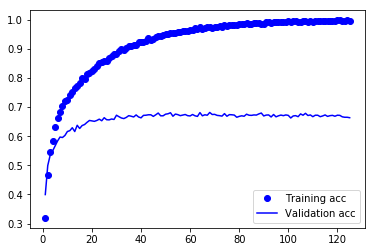

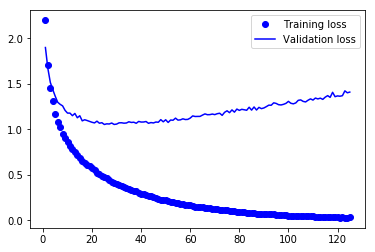

In [55]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
# plt.tilte('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
# plt.tilte('Training and validation loss')
plt.legend()

plt.show()

# 미세조정

In [57]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name =='block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [48]:
from keras.models import load_model

model = load_model('category0423_88_66.h5') # 불러올 모델 이름
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 13)                3341      
Total params: 2,100,749
Trainable params: 2,100,749
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='categorical_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-5),
             metrics = ['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100


ValueError: Error when checking input: expected dense_7_input to have 2 dimensions, but got array with shape (10, 150, 150, 3)

In [ ]:
def smooth_curve(points, factor-0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
            else:
                smoothed_points.append(point)
    return smoothed_points


plt.plot(epochs,
        smooth_curve(acc), 'bo', label= 'Smoothed training acc')

plt.plot(epochs,
        smooth_curve(val_acc), 'b', label= 'Smoothed validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
        smoothed_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
        smoothed_curve(val_loss), 'b', label='Smoothed validation loss')
plt.tittle('Training and Validation loss')
plt.legend()

plt.show()

In [60]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical')

Found 2547 images belonging to 13 classes.


In [61]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

ValueError: Error when checking input: expected dense_11_input to have 2 dimensions, but got array with shape (20, 150, 150, 3)